In [154]:
#TODO Costs and fees

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import pearsonr

In [183]:
targetExposure = 1_000_000.00
marginFactor = 0.05
totalSupply = 1_000_000

In [184]:
def getDollarExposure(spotEntry, noShares):
  return spotEntry * noShares * marginFactor

def getSharesForTargetExposure(underlyingPrice):
  return int(targetExposure / underlyingPrice)

In [185]:
def get_token_nav(o, c):
    targetShares = getSharesForTargetExposure(o)
    dollarExposure = getDollarExposure(float(o), targetShares)
    CFDnotionalTokenValue = (dollarExposure * targetShares) / totalSupply
    return CFDnotionalTokenValue

In [186]:
df = pd.read_csv("./data/USO.csv").set_index('Date').reset_index()

In [187]:
df['shares_traded'] = df.apply(lambda row: getSharesForTargetExposure(row['Open']), axis = 1)
df['token_val_eod'] = df.apply (lambda row: get_token_nav(row['Open'], row['Close']), axis=1)
df['token_daily_return'] = df.apply (lambda row: get_token_nav(row['Open'], None) - get_token_nav(row['Close'], None) , axis=1)

In [190]:
# dollar value of CFD portfolio
df['dollar_exp_o'] = df.apply(lambda row: getDollarExposure(row['Open'], row['shares_traded']), axis=1)
df['notional_exp_o'] = df.apply(lambda row: row['dollar_exp_o'] / marginFactor, axis = 1)
df['dollar_exp_c'] = df.apply(lambda row: getDollarExposure(row['Close'], row['shares_traded']), axis=1)
df['notional_exp_c'] = df.apply(lambda row: row['dollar_exp_c'] / marginFactor, axis = 1)

df['cfd_pl'] = df.apply(lambda row: (row['dollar_exp_c'] - row['dollar_exp_o']) * row['shares_traded'], axis = 1)

In [191]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,shares_traded,token_val_eod,token_daily_return,dollar_exp_o,notional_exp_o,dollar_exp_c,notional_exp_c,cfd_pl
0,2021-11-23,55.450001,56.270000,55.439999,56.200001,56.200001,5877400,18034,901.686761,12.066460,49999.265902,999985.318034,50675.540902,1.013511e+06,1.219594e+07
1,2021-11-24,55.810001,56.380001,55.779999,55.880001,55.880001,4109000,17917,895.803226,1.077726,49997.389396,999947.787917,50060.098896,1.001202e+06,1.123566e+06
2,2021-11-26,52.330002,52.380001,48.560001,49.630001,49.630001,18765600,19109,955.425166,-52.019686,49998.700411,999974.008218,47418.984455,9.483797e+05,-4.929579e+07
3,2021-11-29,51.970001,52.169998,49.639999,50.169998,50.169998,13571400,19241,962.006505,-34.581935,49997.739462,999954.789241,48266.046576,9.653209e+05,-3.331950e+07
4,2021-11-30,48.619999,49.110001,46.470001,47.910000,47.910000,21152500,20567,1028.316599,-15.259941,49998.375972,999967.519433,49268.248500,9.853650e+05,-1.501653e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2022-11-16,72.110001,72.470001,71.379997,72.040001,72.040001,3359600,13867,693.314905,-0.726248,49997.469193,999949.383867,49948.934693,9.989787e+05,-6.730279e+05
248,2022-11-17,71.150002,71.440002,69.519997,70.139999,70.139999,5000100,14054,702.659333,-10.180662,49997.106405,999942.128108,49287.377297,9.857475e+05,-9.974533e+06
249,2022-11-18,67.730003,69.120003,67.459999,69.029999,69.029999,8371700,14764,738.174727,13.897495,49998.288215,999965.764292,50957.945262,1.019159e+06,1.416838e+07
250,2022-11-21,66.669998,69.370003,65.370003,69.029999,69.029999,12862900,14999,749.937476,25.660244,49999.165000,999983.300002,51769.047750,1.035381e+06,2.654647e+07


In [118]:
df['Close'].corr(df['token_nav'], method = 'pearson')

-0.9768162477836785

In [120]:
df[[ 'Close', 'token_nav']]

,Close,token_nav
0,56.200001,901.686761
1,55.880001,895.803226
2,49.630001,955.425166
3,50.169998,962.006505
4,47.910000,1028.316599
...,...,...
247,72.040001,693.314905
248,70.139999,702.659333
249,69.029999,738.174727
250,69.029999,749.937476


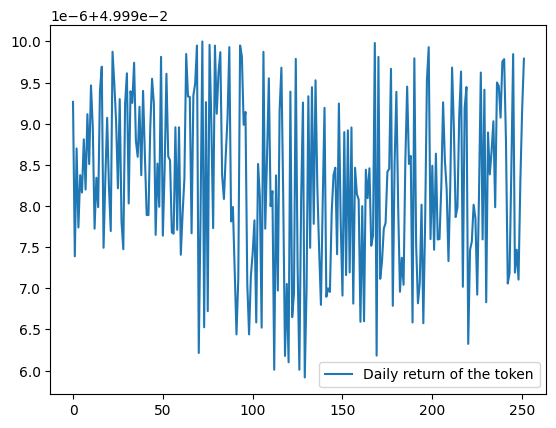

In [46]:
plt.plot(df['Token_Nav'], label = "Daily return of the token", linestyle="-")
# plt.title('Correlation diagram of underlying secuirty and a portfolio constructed of daily rebalanced CFDs', fontsize=8)
#plt.axis('scaled')
plt.legend()
plt.show()